# Hand load evaluation on truss element

In [272]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

Fbrake = 200*9.81




Define node points with xy coordinate and the distance between points

In [273]:
#Define all the nodes
nodes = {   
    "P1" : np.array([0,0]),
    "P2" : np.array([-24,31]),
    "P3" : np.array([18.69,119.5]),
    "P4" : np.array([-24,135.25]),
    "P5" : np.array([20,165]),
    "P6" : np.array([-24,185.23]),
    "P7" : np.array([-24,225.53]),
    "P8" : np.array([40.40,-2.88])
 }
#Define same nodes in matrix form
nodes_mat = {}
for node,coordinate in nodes.items():
    nodes_mat[node] = sym.Matrix(coordinate)

#Calculate distance between nodes and unit vector
distances = {}
versors ={}

for name1, coordinate1 in nodes.items():
    for name2, coordinate2 in nodes.items():
        if name1 != name2:
            distance_name = f"{name1}{name2}"  # Naming distances
            versor_name = f"n{name1}{name2}"   # Naming versors

            dist = np.linalg.norm(coordinate1 - coordinate2)
            distances[distance_name] = dist

            versors[versor_name] = (coordinate1-coordinate2)/dist
            
#To acess to the variable use this notation
print(distances["P1P2"])
print(versors["nP1P2"])

39.20459156782532
[ 0.61217319 -0.79072371]


Plot the brake pedal

In [274]:
def points_line(point1, point2):
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k--')

-0.7907237076139133

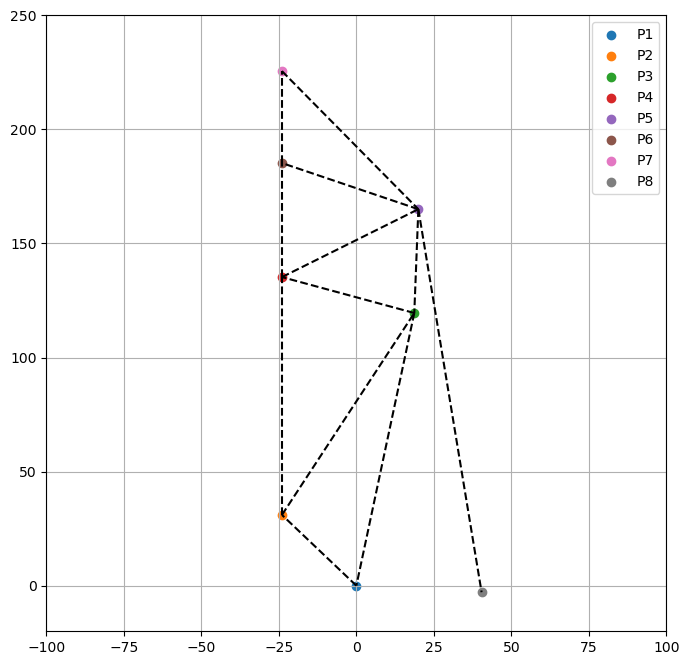

In [275]:
plt.figure(figsize=(8,8))
for name,coordinate in nodes.items():
    plt.scatter(coordinate[0],coordinate[1],label = name)

points_line(nodes["P1"], nodes["P2"])
points_line(nodes["P2"], nodes["P3"])
points_line(nodes["P2"], nodes["P4"])
points_line(nodes["P3"], nodes["P4"])
points_line(nodes["P4"], nodes["P5"])
points_line(nodes["P4"], nodes["P6"])
points_line(nodes["P5"], nodes["P6"])
points_line(nodes["P6"], nodes["P7"])
points_line(nodes["P7"], nodes["P5"])
points_line(nodes["P5"], nodes["P3"])
points_line(nodes["P3"], nodes["P1"])
points_line(nodes["P5"], nodes["P8"])



plt.legend()
plt.xlim(-100, 100)
plt.ylim(-20,250)
plt.grid(1)
#plt.gca().set_asymect('equal', adjustable='box')
versors["nP1P2"][1]

In [276]:
#Define loads and boundary
# Define symbolic variables for reaction forces
R1_y, R1_x, R8_x, R8_y = sym.symbols('R1_y R1_x R8_x R8y')

# Define symbolic variables for each component at each node
N1, N2, N3, N4, N5, N6, N7, N8, N9, N10, N11, N12, N13 = sym.symbols('N1:14')
N1x, N1y = sym.symbols('N1x N1y')
N2x, N2y = sym.symbols('N2x N2y')
N3x, N3y = sym.symbols('N3x N3y')
N4x, N4y = sym.symbols('N4x N4y')
N5x, N5y = sym.symbols('N5x N5y')
N6x, N6y = sym.symbols('N6x N6y')
N7x, N7y = sym.symbols('N7x N7y')
N8x, N8y = sym.symbols('N8x N8y')
N9x, N9y = sym.symbols('N9x N9y')
N10x, N10y = sym.symbols('N10x N10y')
N11x, N11y = sym.symbols('N11x N11y')
N12x, N12y = sym.symbols('N12x N12y')
N13x, N13y = sym.symbols('N13x N13y')

Rax, Ray = sym.symbols('Rax Ray')
Rbx, Rby = sym.symbols('Rbx Rby')

# Define a dictionary for truss forces at each node
truss_forces = {
    "N1": sym.Matrix([N1x, N1y]),
    "N2": sym.Matrix([N2x, N2y]),
    "N3": sym.Matrix([N3x, N3y]),
    "N4": sym.Matrix([N4x, N4y]),
    "N5": sym.Matrix([N5x, N5y]),
    "N6": sym.Matrix([N6x, N6y]),
    "N7": sym.Matrix([N7x, N7y]),
    "N8": sym.Matrix([N8x, N8y]),
    "N9": sym.Matrix([N9x, N9y]),
    "N10": sym.Matrix([N10x, N10y]),
    "N11": sym.Matrix([N11x, N11y]),
    "N12": sym.Matrix([N12x, N12y]),
    "N13": sym.Matrix([N13x, N13y]),

    "RA" : sym.Matrix([Rax,Ray]),
    "RB" : sym.Matrix([Rbx,Rby]),

    "LB7" : sym.Matrix([Fbrake/3,0]),
    "LB6" : sym.Matrix([Fbrake/3,0]),
    "LB4" : sym.Matrix([Fbrake/3,0])

}

#Fisrt of all calculate reaction force
eq1 = truss_forces["RA"] + truss_forces["RB"] + truss_forces["LB7"] + truss_forces["LB6"] + truss_forces["LB4"] - sym.Matrix([0,0])

torque7 = truss_forces["LB7"][0]* nodes_mat["P7"][1] - truss_forces["LB7"][1]* nodes_mat["P7"][0]
torque6 = truss_forces["LB6"][0]* nodes_mat["P6"][1] - truss_forces["LB6"][1]* nodes_mat["P6"][0]
torque4 = truss_forces["LB4"][0]* nodes_mat["P4"][1] - truss_forces["LB4"][1]* nodes_mat["P4"][0]
torqueRB = truss_forces["RB"][0]* nodes_mat["P8"][1] - truss_forces["RB"][1]* nodes_mat["P8"][0]

#impose direction of Reaction Force RB
eq_dir = Rbx/Rby - versors["nP5P8"][0]/versors["nP5P8"][1]

eq_torque = torque7+torque6+torque4+torqueRB

sol1 = sym.solve((eq_dir,eq_torque),(Rbx,Rby))


sol2 = sym.solve(eq1,(Rax,Ray))

Rax = sol2[Rax].subs(Rbx,sol1[Rbx])
Ray = sol2[Ray].subs(Rby,sol1[Rby])
Rbx = sol1[Rbx]
Rby = sol1[Rby]

print("Reaction forces are:","\nRax = ",Rax,"\nRay=",Ray,"\nRbx=",Rbx,"\nRby=",Rby)

Reaction forces are: 
Rax =  -878.555563091199 
Ray= -8916.11039550241 
Rbx= -1083.44443690880 
Rby= 8916.11039550241


In [290]:
def direction(N,unit_vec):
    return N[0]/N[1] - versors[unit_vec][0]/versors[unit_vec][1]




#Now solve the node equations
e1dir = direction(truss_forces["N1"],"nP1P2")
e2dir = direction(truss_forces["N2"],"nP2P3")
e3dir = direction(truss_forces["N3"],"nP2P4")
e4dir = direction(truss_forces["N4"],"nP3P4")
e5dir = direction(truss_forces["N5"],"nP4P6")
e6dir = direction(truss_forces["N6"],"nP4P5")
e7dir = direction(truss_forces["N7"],"nP5P6")
e8dir = direction(truss_forces["N8"],"nP6P7")
e9dir = direction(truss_forces["N9"],"nP5P7")
e10dir = direction(truss_forces["N10"],"nP3P5")
e11dir = direction(truss_forces["N11"],"nP1P3")
e12dir = direction(truss_forces["N12"],"nP5P8")


e8 = truss_forces["N12"]+sym.Matrix([Rbx,Rby])
e1 = truss_forces["N1"] + truss_forces["N11"] + sym.Matrix([Rax,Ray])




In [291]:
from sympy import *
from sympy.abc import x
expr = sin(x)/x

expr.subs({x:3})

versors["nP1P2"]

array([ 0.61217319, -0.79072371])